In [1]:
# 必要ライブラリの宣言
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# PDF出力用
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

### シグモイド関数のグラフ
図8-4

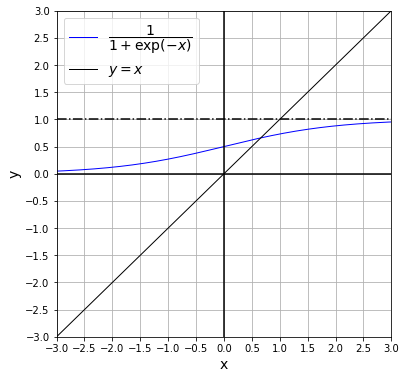

In [3]:
xx =  np.linspace(-6, 6, 500)
yy = 1 / (np.exp(-xx) + 1)

plt.figure(figsize=(6,6))
plt.ylim(-3, 3)
plt.xlim(-3, 3)
plt.xticks(np.linspace(-3,3,13))
plt.yticks(np.linspace(-3,3,13))
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.grid()
plt.plot(xx, yy, c='b', label=r'$\dfrac{1}{1+\exp{(-x)}}$', lw=1)
plt.plot(xx, xx, c='k', label=r'$y = x$', lw=1)
plt.plot([-3,3], [0,0], c='k')
plt.plot([0,0], [-3,3],c='k')
plt.plot([-3,3],[1,1],linestyle='-.',c='k')
plt.legend(fontsize=14)
plt.show()

### データ準備

In [4]:
# 学習用データ準備
from sklearn.datasets import load_iris
iris = load_iris()
x_org, y_org = iris.data, iris.target
print('元データ', x_org.shape, y_org.shape)

元データ (150, 4) (150,)


In [5]:
# データ絞り込み
#   クラス0, 1のみ
#   項目sepal_lengthとsepal_widthのみ
x_data, y_data = iris.data[:100,:2], iris.target[:100]
print('対象データ', x_data.shape, y_data.shape)

対象データ (100, 2) (100,)


In [6]:
# ダミー変数を追加
x_data = np.insert(x_data, 0, 1.0, axis=1)
print('ダミー変数追加後', x_data.shape)

ダミー変数追加後 (100, 3)


In [7]:
# 　元データのサイズ
print(x_data.shape, y_data.shape)
# 学習データ、検証データに分割 (シャフルも同時に実施)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, train_size=70, test_size=30, 
    random_state=123)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(100, 3) (100,)
(70, 3) (30, 3) (70,) (30,)


### 学習データの散布図表示

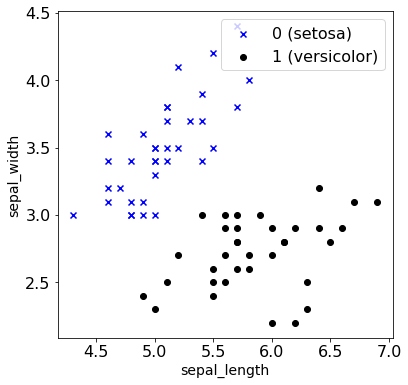

In [8]:
# 散布図の表示
x_t0 = x_train[y_train == 0]
x_t1 = x_train[y_train == 1]
plt.figure(figsize=(6,6))
plt.scatter(x_t0[:,1], x_t0[:,2], marker='x', c='b', label='0 (setosa)')
plt.scatter(x_t1[:,1], x_t1[:,2], marker='o', c='k', label='1 (versicolor)')
plt.xlabel('sepal_length', fontsize=14)
plt.ylabel('sepal_width', fontsize=14)
plt.xticks(size=16)
plt.yticks(size=16)
plt.legend(fontsize=16)
plt.show()

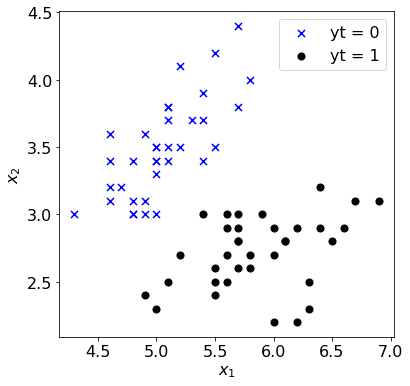

In [9]:
# 散布図の表示
x_t0 = x_train[y_train == 0]
x_t1 = x_train[y_train == 1]
plt.figure(figsize=(6,6))
plt.scatter(x_t0[:,1], x_t0[:,2], marker='x', s=50, c='b', label='yt = 0')
plt.scatter(x_t1[:,1], x_t1[:,2], marker='o', s=50, c='k', label='yt = 1')
plt.xlabel(r'$x_1$', fontsize=16)
plt.ylabel(r'$x_2$', fontsize=16)
plt.xticks(size=16)
plt.yticks(size=16)
plt.legend(fontsize=16)
plt.show()

### 学習用変数の設定

In [10]:
# 学習用変数の設定
x = x_train
yt = y_train

In [11]:
# 入力データ x の表示 (ダミーデータを含む)
print(x[:5])

[[1.  5.1 3.7]
 [1.  5.5 2.6]
 [1.  5.5 4.2]
 [1.  5.6 2.5]
 [1.  5.4 3. ]]


In [12]:
# 正解値 yt の表示
print(yt[:5])

[0 1 0 1 1]


### 予測関数

In [13]:
# シグモイド関数
def sigmoid(x):
    return 1/(1+ np.exp(-x))

In [14]:
# 予測値の計算
def pred(x, w):
    return sigmoid(x @ w)

### 評価

In [15]:
# 損失関数(交差エントロピー関数)
def cross_entropy(yt, yp):
    # 交差エントロピーの計算(この段階ではベクトル) (p216 の 8.4.3式)
    ce1 = -(yt * np.log(yp) + (1 - yt) * np.log(1 - yp))
    # 交差エントロピーベクトルの平均値を計算
    return(np.mean(ce1)) 

In [16]:
# 予測結果の確率値から 0 or 1 を判断する関数
def classify(y):
    return np.where(y < 0.5, 0, 1)

In [17]:
# モデルの評価を行う関数
from sklearn.metrics import accuracy_score
def evaluate(xt, yt, w):
    
    # 予測値の計算
    yp = pred(xt, w)
    
    # 損失関数値の計算
    loss = cross_entropy(yt, yp)
    
    # 予測値(確率値)を0または1に変換
    yp_b = classify(yp)
    
    #精度の算出
    score = accuracy_score(yt, yp_b)
    return loss, score

### 初期化処理

In [18]:
# 初期化処理

# 標本数
M  = x.shape[0]
# 入力次元数(ダミー変数を含む)
D = x.shape[1]

# 繰り返し回数
iters = 10000

# 学習率
alpha = 0.01

# 初期値
w = np.ones(D)

# 評価結果記録用 (損失関数と精度)
history = np.zeros((0,3))

In [33]:
w

array([ 0.33861016,  2.97004552, -5.30003644])

### メイン処理

In [19]:
# 繰り返しループ

for k in range(iters):
    
    # 予測値の計算 (8.6.1) (8.6.2)
    yp = pred(x, w)
    
    # 誤差の計算 (8.6.4)
    yd = yp - yt
    
    # 勾配降下法の実施 (8.6.6)
    w = w - alpha * (x.T @ yd) / M
    
    # ログ記録用
    if ( k % 10 == 0):
        loss, score = evaluate(x_test, y_test, w)
        history = np.vstack((history, 
            np.array([k, loss, score])))
        print( "iter = %d  loss = %f score = %f" 
            % (k, loss, score))

iter = 0  loss = 4.493842 score = 0.500000
iter = 10  loss = 3.565375 score = 0.500000
iter = 20  loss = 2.643280 score = 0.500000
iter = 30  loss = 1.762444 score = 0.500000
iter = 40  loss = 1.085375 score = 0.500000
iter = 50  loss = 0.818721 score = 0.500000
iter = 60  loss = 0.770934 score = 0.500000
iter = 70  loss = 0.761053 score = 0.333333
iter = 80  loss = 0.754468 score = 0.200000
iter = 90  loss = 0.747781 score = 0.166667
iter = 100  loss = 0.740979 score = 0.133333
iter = 110  loss = 0.734193 score = 0.166667
iter = 120  loss = 0.727485 score = 0.200000
iter = 130  loss = 0.720875 score = 0.200000
iter = 140  loss = 0.714368 score = 0.266667
iter = 150  loss = 0.707967 score = 0.300000
iter = 160  loss = 0.701670 score = 0.366667
iter = 170  loss = 0.695476 score = 0.433333
iter = 180  loss = 0.689383 score = 0.500000
iter = 190  loss = 0.683389 score = 0.566667
iter = 200  loss = 0.677493 score = 0.700000
iter = 210  loss = 0.671693 score = 0.700000
iter = 220  loss = 0.

iter = 2340  loss = 0.270424 score = 0.966667
iter = 2350  loss = 0.269868 score = 0.966667
iter = 2360  loss = 0.269316 score = 0.966667
iter = 2370  loss = 0.268768 score = 0.966667
iter = 2380  loss = 0.268224 score = 0.966667
iter = 2390  loss = 0.267683 score = 0.966667
iter = 2400  loss = 0.267146 score = 0.966667
iter = 2410  loss = 0.266613 score = 0.966667
iter = 2420  loss = 0.266083 score = 0.966667
iter = 2430  loss = 0.265557 score = 0.966667
iter = 2440  loss = 0.265034 score = 0.966667
iter = 2450  loss = 0.264515 score = 0.966667
iter = 2460  loss = 0.263999 score = 0.966667
iter = 2470  loss = 0.263486 score = 0.966667
iter = 2480  loss = 0.262977 score = 0.966667
iter = 2490  loss = 0.262471 score = 0.966667
iter = 2500  loss = 0.261969 score = 0.966667
iter = 2510  loss = 0.261469 score = 0.966667
iter = 2520  loss = 0.260973 score = 0.966667
iter = 2530  loss = 0.260481 score = 0.966667
iter = 2540  loss = 0.259991 score = 0.966667
iter = 2550  loss = 0.259505 score

iter = 4590  loss = 0.199853 score = 0.966667
iter = 4600  loss = 0.199678 score = 0.966667
iter = 4610  loss = 0.199503 score = 0.966667
iter = 4620  loss = 0.199329 score = 0.966667
iter = 4630  loss = 0.199155 score = 0.966667
iter = 4640  loss = 0.198982 score = 0.966667
iter = 4650  loss = 0.198810 score = 0.966667
iter = 4660  loss = 0.198638 score = 0.966667
iter = 4670  loss = 0.198467 score = 0.966667
iter = 4680  loss = 0.198297 score = 0.966667
iter = 4690  loss = 0.198127 score = 0.966667
iter = 4700  loss = 0.197958 score = 0.966667
iter = 4710  loss = 0.197790 score = 0.966667
iter = 4720  loss = 0.197622 score = 0.966667
iter = 4730  loss = 0.197455 score = 0.966667
iter = 4740  loss = 0.197289 score = 0.966667
iter = 4750  loss = 0.197123 score = 0.966667
iter = 4760  loss = 0.196958 score = 0.966667
iter = 4770  loss = 0.196794 score = 0.966667
iter = 4780  loss = 0.196630 score = 0.966667
iter = 4790  loss = 0.196466 score = 0.966667
iter = 4800  loss = 0.196304 score

iter = 6650  loss = 0.174055 score = 0.966667
iter = 6660  loss = 0.173966 score = 0.966667
iter = 6670  loss = 0.173878 score = 0.966667
iter = 6680  loss = 0.173789 score = 0.966667
iter = 6690  loss = 0.173701 score = 0.966667
iter = 6700  loss = 0.173613 score = 0.966667
iter = 6710  loss = 0.173526 score = 0.966667
iter = 6720  loss = 0.173438 score = 0.966667
iter = 6730  loss = 0.173351 score = 0.966667
iter = 6740  loss = 0.173264 score = 0.966667
iter = 6750  loss = 0.173178 score = 0.966667
iter = 6760  loss = 0.173091 score = 0.966667
iter = 6770  loss = 0.173005 score = 0.966667
iter = 6780  loss = 0.172919 score = 0.966667
iter = 6790  loss = 0.172834 score = 0.966667
iter = 6800  loss = 0.172748 score = 0.966667
iter = 6810  loss = 0.172663 score = 0.966667
iter = 6820  loss = 0.172578 score = 0.966667
iter = 6830  loss = 0.172494 score = 0.966667
iter = 6840  loss = 0.172409 score = 0.966667
iter = 6850  loss = 0.172325 score = 0.966667
iter = 6860  loss = 0.172241 score

iter = 8680  loss = 0.160045 score = 0.966667
iter = 8690  loss = 0.159991 score = 0.966667
iter = 8700  loss = 0.159938 score = 0.966667
iter = 8710  loss = 0.159885 score = 0.966667
iter = 8720  loss = 0.159832 score = 0.966667
iter = 8730  loss = 0.159779 score = 0.966667
iter = 8740  loss = 0.159726 score = 0.966667
iter = 8750  loss = 0.159674 score = 0.966667
iter = 8760  loss = 0.159621 score = 0.966667
iter = 8770  loss = 0.159569 score = 0.966667
iter = 8780  loss = 0.159516 score = 0.966667
iter = 8790  loss = 0.159464 score = 0.966667
iter = 8800  loss = 0.159412 score = 0.966667
iter = 8810  loss = 0.159360 score = 0.966667
iter = 8820  loss = 0.159308 score = 0.966667
iter = 8830  loss = 0.159257 score = 0.966667
iter = 8840  loss = 0.159205 score = 0.966667
iter = 8850  loss = 0.159153 score = 0.966667
iter = 8860  loss = 0.159102 score = 0.966667
iter = 8870  loss = 0.159051 score = 0.966667
iter = 8880  loss = 0.159000 score = 0.966667
iter = 8890  loss = 0.158949 score

### 結果確認

In [20]:
#損失関数値と精度の確認
print('初期状態: 損失関数:%f 精度:%f' 
      % (history[0,1], history[0,2]))
print('最終状態: 損失関数:%f 精度:%f' 
      % (history[-1,1], history[-1,2]))

初期状態: 損失関数:4.493842 精度:0.500000
最終状態: 損失関数:0.153947 精度:0.966667


In [21]:
# 検証データを散布図用に準備
x_t0 = x_test[y_test==0]
x_t1 = x_test[y_test==1]

# 決定境界描画用 x1の値から x2の値を計算する
# x1はX軸、x2はy軸である。
# p209の 式 w0 + x1x1 + w2x2 = 0 を元に x2を左辺、x1を右辺にまとめると b(x, w) の中の
# 式が出てくる
def b(x, w):
    return(-(w[0] + w[1] * x)/ w[2])
# 散布図のx1の最小値と最大値
xl = np.asarray([x[:,1].min(), x[:,1].max()])
yl = b(xl, w)

In [34]:
xl

array([4.3, 6.9])

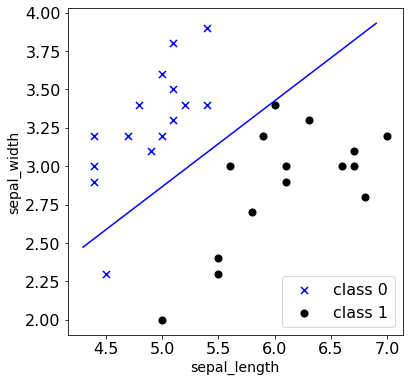

In [22]:
plt.figure(figsize=(6,6))
# 散布図の表示
plt.scatter(x_t0[:,1], x_t0[:,2], marker='x', 
        c='b', s=50, label='class 0')
plt.scatter(x_t1[:,1], x_t1[:,2], marker='o', 
        c='k', s=50, label='class 1')
# 散布図に決定境界の直線も追記
plt.plot(xl, yl, c='b')
plt.xlabel('sepal_length', fontsize=14)
plt.ylabel('sepal_width', fontsize=14)
plt.xticks(size=16)
plt.yticks(size=16)
plt.legend(fontsize=16)
plt.show()

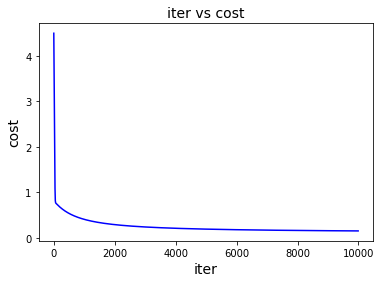

In [23]:
# 学習曲線の表示をします (損失関数)
plt.figure(figsize=(6,4))
plt.plot(history[:,0], history[:,1], 'b')
plt.xlabel('iter', fontsize=14)
plt.ylabel('cost', fontsize=14)
plt.title('iter vs cost', fontsize=14)
plt.show()

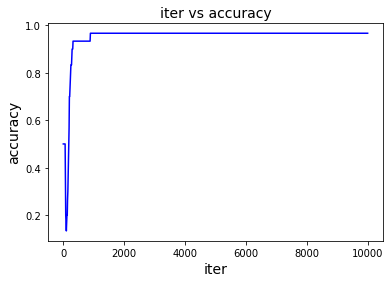

In [24]:
# 学習曲線の表示をします (精度)
plt.figure(figsize=(6,4))
plt.plot(history[:,0], history[:,2], 'b')
plt.xlabel('iter', fontsize=14)
plt.ylabel('accuracy', fontsize=14)
plt.title('iter vs accuracy', fontsize=14)
plt.show()

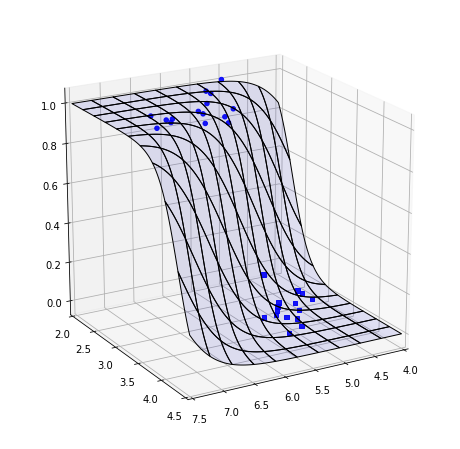

In [25]:
from mpl_toolkits.mplot3d import Axes3D
x1 = np.linspace(4, 7.5, 100)
x2 = np.linspace(2, 4.5, 100)
xx1, xx2 = np.meshgrid(x1, x2)
xxx = np.asarray([np.ones(xx1.ravel().shape), 
    xx1.ravel(), xx2.ravel()]).T
c = pred(xxx, w).reshape(xx1.shape)
plt.figure(figsize=(8,8))
ax = plt.subplot(1, 1, 1, projection='3d')
ax.plot_surface(xx1, xx2, c, color='blue', 
    edgecolor='black', rstride=10, cstride=10, alpha=0.1)
ax.scatter(x_t1[:,1], x_t1[:,2], 1, s=20, alpha=0.9, marker='o', c='b')
ax.scatter(x_t0[:,1], x_t0[:,2], 0, s=20, alpha=0.9, marker='s', c='b')
ax.set_xlim(4,7.5)
ax.set_ylim(2,4.5)
ax.view_init(elev=20, azim=60)

## scikit-learnライブラリの利用

In [26]:
# 必要ライブラリのロード
from sklearn.linear_model import LogisticRegression
from sklearn import svm

# モデル生成
model_lr = LogisticRegression(solver='liblinear')
model_svm = svm.SVC(kernel='linear')

# 機械学習実施
model_lr.fit(x, yt)
model_svm.fit(x, yt)

SVC(kernel='linear')

In [27]:
# 線形回帰
# 切片の値
lr_w0 = model_lr.intercept_[0]
# x1(sepal_length)の係数
lr_w1 = model_lr.coef_[0,1]
# x2(sepal_width)の係数
lr_w2 = model_lr.coef_[0,2]

# SVM
# 切片の値
svm_w0 = model_svm.intercept_[0]
# x1(sepal_length)の係数
svm_w1 = model_svm.coef_[0,1]
# x2(sepal_width)の係数
svm_w2 = model_svm.coef_[0,2]

In [28]:
# 限界直線描画用 x1の値から x2の値を計算する
def rl(x):
    wk = lr_w0 + lr_w1 * x
    wk2 = -wk / lr_w2
    return(wk2)

In [29]:
# 限界直線描画用 x1の値から x2の値を計算する
def svm(x):
    wk = svm_w0 + svm_w1 * x
    wk2 = -wk / svm_w2
    return(wk2)

In [30]:
y_rl = rl(xl)
y_svm = svm(xl)
# 結果確認
print(xl, yl, y_rl, y_svm)

[4.3 6.9] [2.47353128 3.93052473] [2.50344682 4.05984593] [2.17911792 4.42574136]


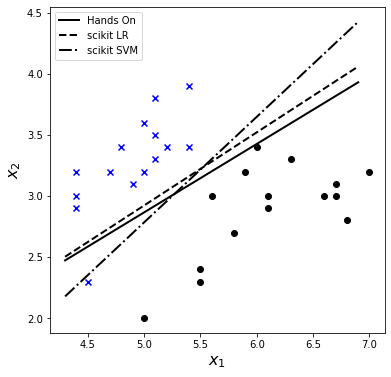

In [31]:
# 散布図に限界直線も追記する
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
# 散布図の表示
plt.scatter(x_t0[:,1], x_t0[:,2], marker='x', c='b')
plt.scatter(x_t1[:,1], x_t1[:,2], marker='o', c='k')
# 限界直線の表示
ax.plot(xl, yl, linewidth=2, c='k', label='Hands On')
# lr model
ax.plot(xl, y_rl, linewidth=2, c='k', linestyle="--", label='scikit LR')
# svm
ax.plot(xl, y_svm, linewidth=2, c='k', linestyle="-.", label='scikit SVM')

ax.legend()
ax.set_xlabel('$x_1$', fontsize=16)
ax.set_ylabel('$x_2$', fontsize=16)
plt.show()